### Importing Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Importing Dataset

In [18]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

### Accessing the data

In [19]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [21]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [22]:
# Neighbourhood group was 'brookln' instead of "Brooklyn"
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


##### Problems identified within the Data

* 541 duplicated records were found in the Data.
* Insufficient information were recorded for the house_rules and Licence columns.
* Dollar signs and commas recorded along with the values for price and service fee.
* The currency for price and service fee were not added to the column's titles.
* Missing values in some records
* Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes.
* In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.
* Some outliers were identified in the availability 365 column.



### Clean the data

##### Steps to be taken for Data cleaning

* Drop duplicated records
* Drop house_rules and license columns with insufficient data.
* Remove all dollar signs in the price and service fee columns.
* Remove all commas from the price and service fee columns.
* Rename the price and service fee columns to include a dollar signs.
* Drop all records with missing values.
* Change all mismatched data types to the appropriate once.
* Correct the Spelling of 'brookln' to 'Brooklyn'
* Get rid of outliers in the 'availability 365' column data.



Cleaning data by dropping certain data

In [23]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

# Dropping house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True)

# Removing all dollar signs in the price adn service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex = False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex = False)

# Removing all commas in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace(',', '', regex = False)
df['service fee'] = df['service fee'].astype(str).str.replace(',', '', regex = False)

# Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price':'price_$',
    'service fee':'service fee_$'
}, inplace = True)

# Dropping all records with missing values
df.dropna(inplace = True)

# Changing all the mismatched data types to the appropriate ones.
df['price_$'] = df['price_$'].astype('float')
df['service fee_$'] = df['service fee_$'].astype('float')
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correcting the spelling from 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the 'avaliability 365' column data
df.drop(df[df['availability 365'] > 500].index, inplace=True)

display(df.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0
5,1004098,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,...,2013,577.0,115.0,3.0,74.0,2019-06-22,0.59,3.0,1.0,374.0
7,1005202,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,...,2009,1060.0,212.0,45.0,49.0,2017-10-05,0.40,5.0,1.0,219.0


In [24]:
df.duplicated().value_counts()

,count
False,83796


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

### Exploratory Data Analysis (EDA)

EDA is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends and insights.  
In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution and relationships between variables.  
Using techniques such as summary statistics, data visualization and correlation analysis, EDA helps with further investigation and hypothesis testing, guiding subsiquent analytical decisions.

In [26]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


#### What are the different property types in the dataset?

In [27]:
# What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


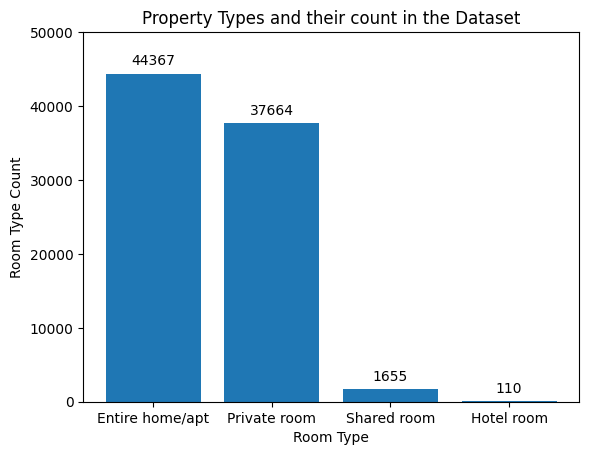

In [28]:
# Room type count plotted on a barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels= property_types.loc[:,"count"], padding= 4);
plt.ylim([0,50000]);
plt.title('Property Types and their count in the Dataset');
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.show();

The Airbnb dataset revealed four distinct property or room types. These categories comprise:

* Entire home/apt
* Private room
* Shared room
* Hotel room
  
A barchart was used to visually illustrate data:  
Entire home/apt dominates the dataset with 44,367 occurances  
Private room with 37,664 occurances  
Shared room has 1655 occurances  
Hotel room has 110 occurances

#### Which neighborhood group has the highest number of listings?

In [29]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


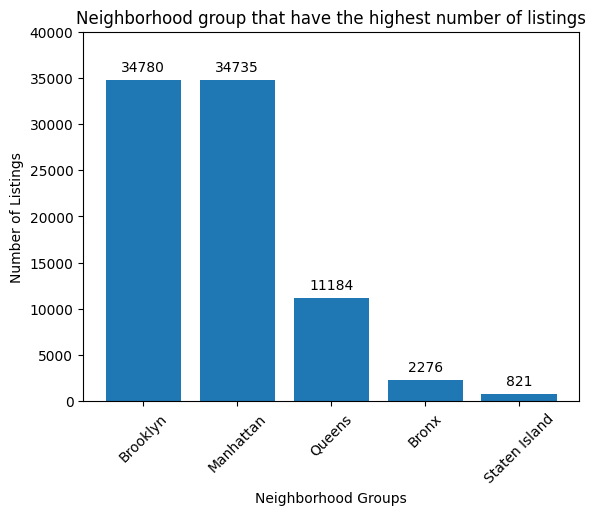

In [30]:
# Which neighborhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels= hood_group.loc[:,"count"], padding= 4);
plt.ylim([0,40000]);
plt.title("Neighborhood group that have the highest number of listings");
plt.xlabel("Neighborhood Groups");
plt.xticks(rotation=45);
plt.ylabel("Number of Listings");
plt.show();

From the barchart we can observe:  
* 5 different data groups (Brooklyn, Manhattan, Queens, Bronx, Staten Island)
* Brooklyn has the highest number of listings numbered at 34780
* The second highest is Manhattan with listings numbered at 34735
* The lowest is Staten Island with listings numbered at 821

#### Which neighborhoods group have the highest average prices for Airbnb listings?

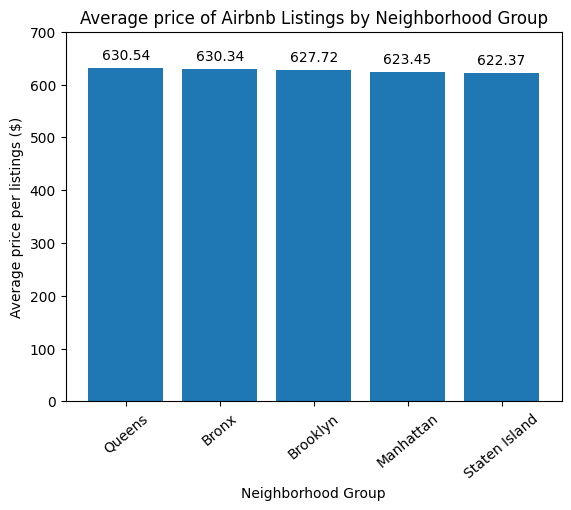

In [31]:
# Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price_$"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding =4);
plt.ylim([0,700]);
plt.xlabel('Neighborhood Group');
plt.xticks(rotation = 40);
plt.ylabel('Average price per listings ($)');
plt.title('Average price of Airbnb Listings by Neighborhood Group');
plt.show();

Among the 5 identified Neighborhood groups in the dataset the Average price listings are as follows:
* Queens has highest average listing price at 630.54 USD
* Bronx has the second highest average listing price at 630.34 USD
* The lowest average listing price is of Staten Island at 622.37 USD

#### Is there a relationship between the construction year of property and price?

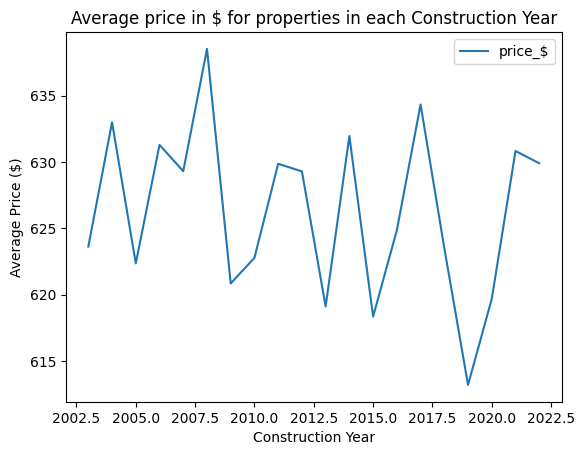

In [32]:
# Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average price in $ for properties in each Construction Year');
plt.show();

The above line plot for depicting the relation between construction year of properties versus the average price per property reveles a noticeable downward trend in prices as the construction years progress.  
The pattern demonstrates decreasing highs and lows, thus suggesting an overall decline in property prices as time progresses.

#### Who are the top 10 hosts by calculated host listing count?
  
From the numerious hosts in the dataset, we will see the 10 hosts with the highest calculated host count.

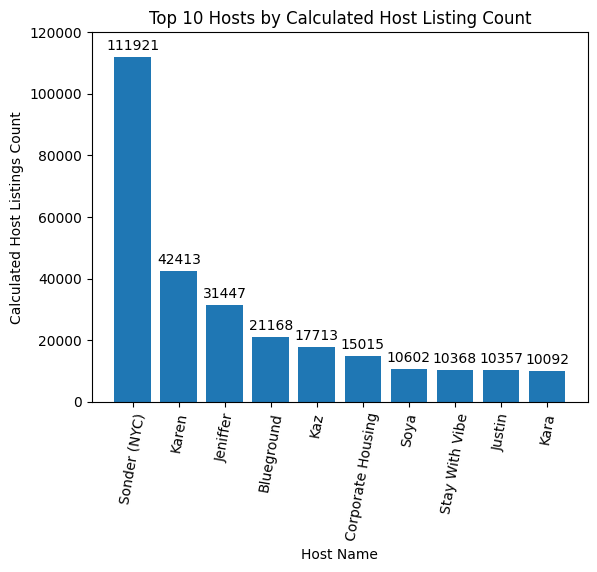

In [33]:
# Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:,'calculated host listings count'], label_type='edge', padding = 3);
plt.xlabel('Host Name');
plt.xticks(rotation = 80);
plt.ylabel('Calculated Host Listings Count');
plt.ylim([0,120000]);
plt.title('Top 10 Hosts by Calculated Host Listing Count');
plt.show();

Using the above bar chart we can calculate the top 10 hosts based on the calculated listing count:  

1st is Sonder (NYC) notable leading with 111921 listings.   
2nd is Karen with 42413 listings.  
3rd is Jeniffer with 31447 listings.  
4th is Blueground with 21168 listings.  
5th is Kaz with 17713 listings.  
6th is Corporate Housing with 15015 listings.  
7th is Soya with 10602 listings.  
8th is Stay With Vibe with 10368 listings.  
9th is Justin with 10357 listings.  
10th is Kara with 10092 listings.

#### Are hosts with verified identities more likely to receive positive reviews?

In [34]:
# Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


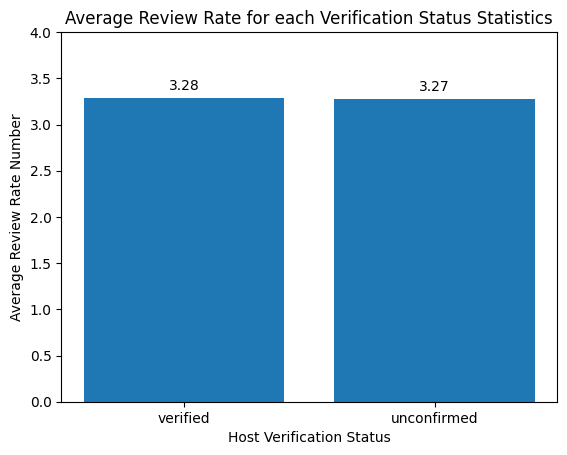

In [43]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"],2), padding=4);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.ylim([0,4]);
plt.title('Average Review Rate for each Verification Status Statistics');
plt.show();

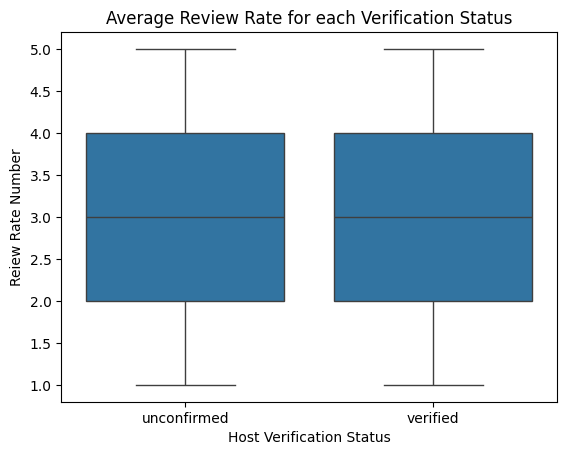

In [44]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = 'host_identity_verified', y="review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Reiew Rate Number');
plt.title('Average Review Rate for each Verification Status');
plt.show();

The average review rates for verified and unconfirmed hosts are 3.28 abd 3.27, respectively indicating a marginal difference in their review rates, with verified hosts having a slightly higher rate.  
This suggests that verified hosts are not necessarily more likely to receive positive reviews compared to unconfirmed hosts.

#### Is there a correlation between the price of a listing and its service fee?

In [41]:
# Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service fee_$'])

np.float64(0.9999909082976466)

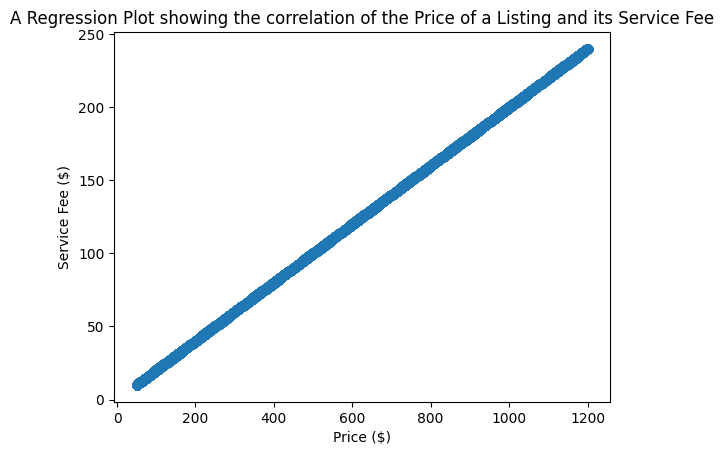

In [45]:
sns.regplot(df, x='price_$', y='service fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the correlation of the Price of a Listing and its Service Fee');
plt.show();

The Pearson correlation coefficient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables.  
On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of a property increases, so does its service fee.

#### What is the average review rate number (stars) for listings and does it vary based on the neighborhood group and room type?

In [46]:
# What is the average review rate number (stars) for listings and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

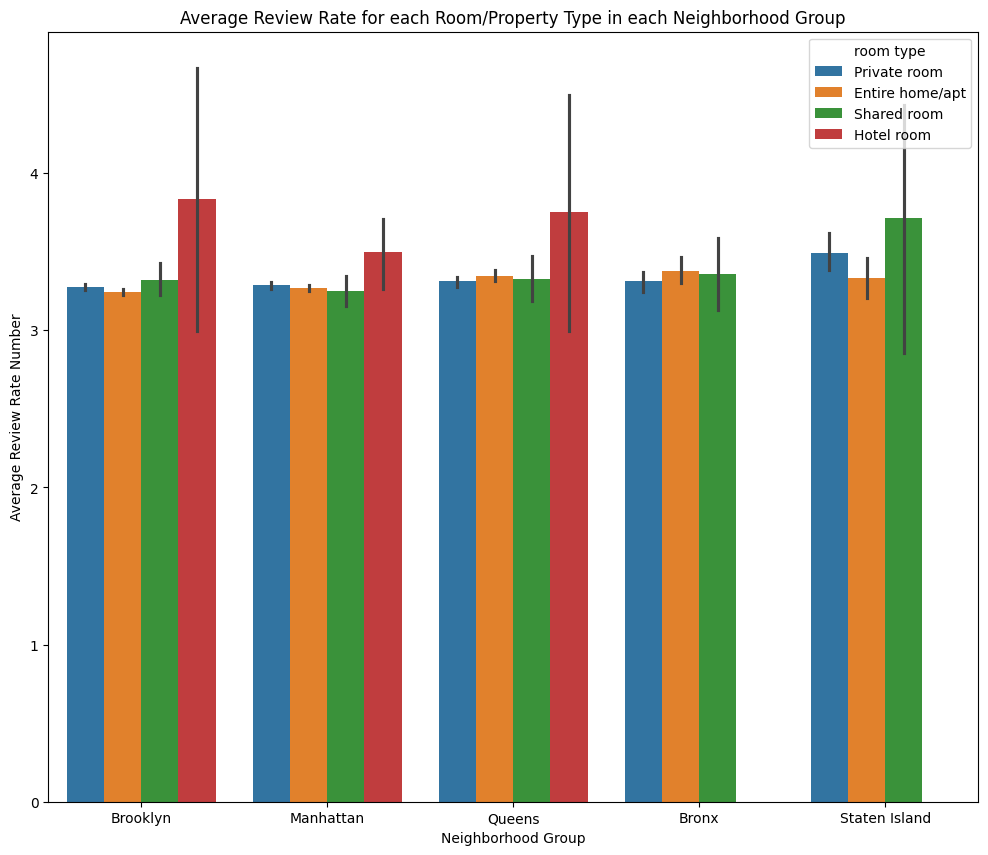

In [47]:
plt.figure(figsize=[12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighborhood Group');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Room/Property Type in each Neighborhood Group');
plt.show();

Hotel rooms exhibt has higher review rate compared to all other property types within the three neighborhood groups where they are located:  
Brooklyn, Manhattan and Queens

#### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

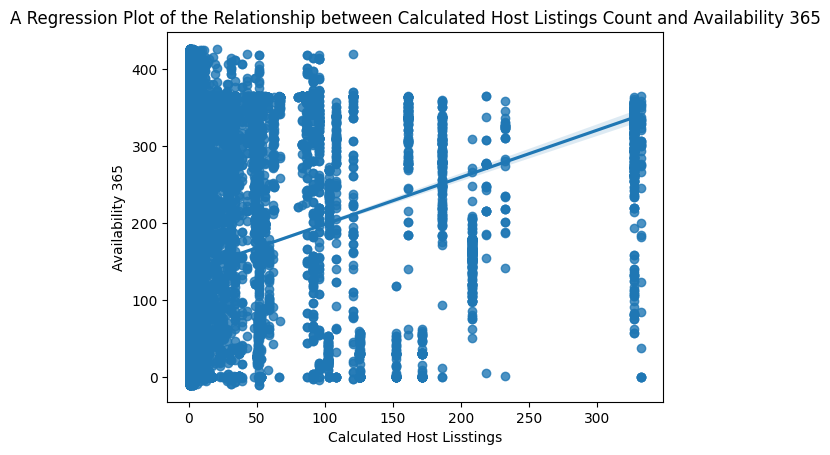

In [48]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x= 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Lisstings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');
plt.show();

In [49]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1353372562905428)

The Pearson correlation coefficient for the association between calculated host listings and avaliability 365 is 0.136, indicating a weak positive correlation between the two variables.

## Conclusion  
  
In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Though data wrangling, exploratory data analysis (EDA) and interpretation of summary statistics, we've uncovered valuable insights into listing distribution, pricing dynamics, host and review analysis.  
  
Key findings including the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.
  
Furthermore, conduction sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, scuh as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.
